In [114]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
import random as rnd

In [115]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=float)
y_seeds = np.array([0,1,1,0])

In [116]:
N = 1000
idxs = np.random.randint(0,4,N)

In [117]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [118]:
X += np.random.normal(scale = 0.25, size = X.shape)

In [119]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)

    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def predict(self,x):
        z1 = np.matmul(self.W1,x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2,a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1,a1,z2,a2)

In [131]:
model = shallow_neural_network(2,3)

In [132]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (z1,a1,z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
        
        diff = a2-y
        
        # layer 2
        db2 += diff
        dW2 += a1 * diff  # Vectorized update for W2
        
        # layer 1
        delta1 = (1 - a1 ** 2) * model.W2 * diff  # Vectorized delta for hidden layer
        db1 += delta1  # Update for biases in layer 1
        dW1 += np.outer(delta1, x)  # Outer product for dW1 (vectorized)
    
    cost /= m
    
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
    
    return cost

In [133]:
for epoch in range(200):
    cost = train(X,Y, model, 1.0)
    if epoch %10 == 0:
        print(epoch, cost)

0 [0.90110881]
10 [0.57588254]
20 [0.46182252]
30 [0.37601767]
40 [0.31808539]
50 [0.27774956]
60 [0.24943882]
70 [0.22921658]
80 [0.21442633]
90 [0.20333927]
100 [0.1948348]
110 [0.18817632]
120 [0.18286902]
130 [0.17857242]
140 [0.17504657]
150 [0.1721186]
160 [0.16966135]
170 [0.16757961]
180 [0.16580088]
190 [0.16426915]


In [134]:
model.predict((1,1))[0].item()

0.023260963209492384

In [135]:
model.predict((1,0))[0].item()

0.9932454900326431

In [136]:
model.predict((0,1))[0].item()

0.9452550670997598

In [137]:
model.predict((0,0))[0].item()

0.011012198412238458

In [81]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [82]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [83]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

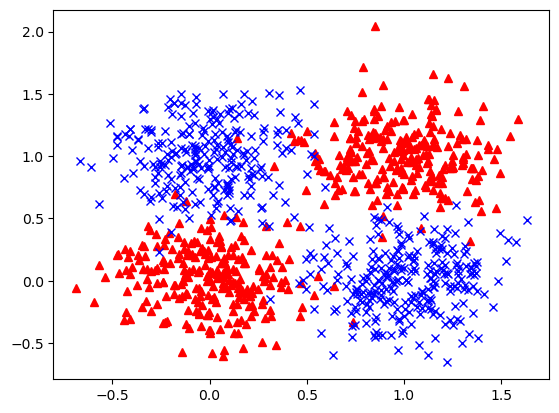

In [138]:
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.savefig(f'homework2.png')